Notebook to examined 3.6 test runs

In [1]:
import netCDF4 as nc
import numpy as np
from salishsea_tools import nc_tools
import datetime

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dT = nc.Dataset('/data/nsoontie/MEOPAR/SalishSea/results/2Ddomain/3.6/more_tides/SalishSea_4h_20020915_20021013_grid_T.nc')
sal = dT.variables['vosaline'][:]
sal = np.ma.masked_values(sal,0)
deps = dT.variables['deptht'][:]
temp = dT.variables['votemper'][:]
temp = np.ma.masked_values(temp,0)
ssh = dT.variables['sossheig'][:]
n2 = dT.variables['buoy_n2'][:]
times = dT.variables['time_counter'][:]
time_origin = datetime.datetime.strptime(dT.variables['time_counter'].time_origin, '%Y-%m-%d %H:%M:%S')

dU = nc.Dataset('/data/nsoontie/MEOPAR/SalishSea/results/2Ddomain/3.6/more_tides/SalishSea_4h_20020915_20021013_grid_U.nc')
U = dU.variables['vozocrtx'][:]
U = np.ma.masked_values(U,0)
depsU=dU.variables['depthu'][:]

dW = nc.Dataset('/data/nsoontie/MEOPAR/SalishSea/results/2Ddomain/3.6/more_tides/SalishSea_4h_20020915_20021013_grid_W.nc')
avt = dW.variables['vert_eddy_diff'][:]
avt = np.ma.masked_values(avt,0)
avm = dW.variables['vert_eddy_visc'][:]
avm = np.ma.masked_values(avm,0)
depsW=dW.variables['depthw'][:]




#Salinity

<matplotlib.colorbar.Colorbar instance at 0x7f3f7ea85e60>

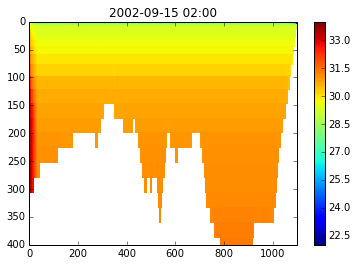

In [3]:
smin=22
smax=34
t=0
y=3
plt.pcolormesh(np.arange(0,sal.shape[3]),deps,sal[t,:,y,:],vmin=smin,vmax=smax)
plt.axis([0,1100,400,0])
date =time_origin + datetime.timedelta(seconds = times[t])
plt.title(date.strftime('%Y-%m-%d %H:%M'))
plt.colorbar()

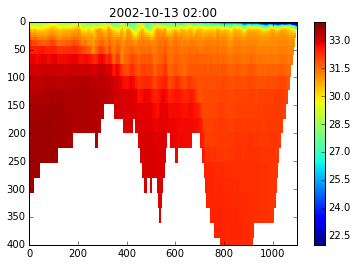

In [4]:
t=-1
plt.pcolormesh(np.arange(0,sal.shape[3]),deps,sal[t,:,y,:],vmin=smin,vmax=smax)
plt.axis([0,1100,400,0])
plt.colorbar()
date =time_origin + datetime.timedelta(seconds = times[t])
plt.title(date.strftime('%Y-%m-%d %H:%M'))

Is there enough mixing over the sill? Looks like salty water has plunged into the SoG basin.

#Temperature

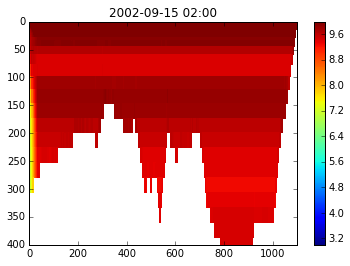

In [5]:
tmin=3; tmax=10
t=0
plt.pcolormesh(np.arange(0,sal.shape[3]),deps,temp[t,:,y,:],vmin=tmin,vmax=tmax)
plt.axis([0,1100,400,0])
plt.colorbar()
date =time_origin + datetime.timedelta(seconds = times[t])
plt.title(date.strftime('%Y-%m-%d %H:%M'))

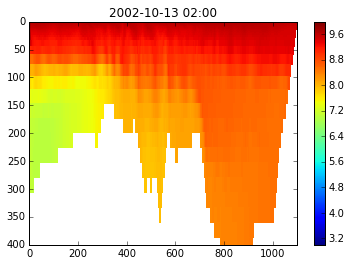

In [6]:

t=-1
plt.pcolormesh(np.arange(0,sal.shape[3]),deps,temp[t,:,y,:],vmin=tmin,vmax=tmax)
plt.axis([0,1100,400,0])
plt.colorbar()
date =time_origin + datetime.timedelta(seconds = times[t])
plt.title(date.strftime('%Y-%m-%d %H:%M'))

# U

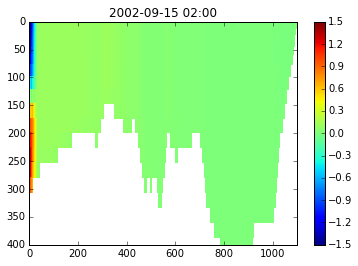

In [7]:
t=0
umin=-1.5
umax=1.5
plt.pcolormesh(np.arange(0,U.shape[3]),depsU,U[t,:,y,:],vmin=umin,vmax=umax)
plt.axis([0,1100,400,0])
plt.colorbar()
date =time_origin + datetime.timedelta(seconds = times[t])
plt.title(date.strftime('%Y-%m-%d %H:%M'))

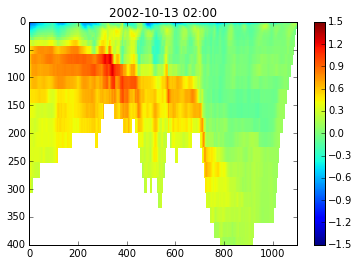

In [8]:
t=-1
plt.pcolormesh(np.arange(0,U.shape[3]),depsU,U[t,:,y,:],vmin=umin,vmax=umax)
plt.axis([0,1100,400,0])
plt.colorbar()
date =time_origin + datetime.timedelta(seconds = times[t])
plt.title(date.strftime('%Y-%m-%d %H:%M'))

#SSH and tides

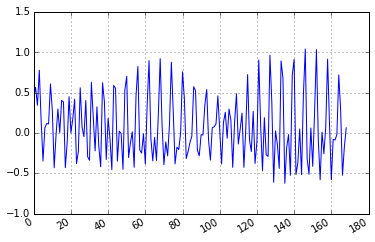

In [9]:
dates = [time_origin + datetime.timedelta(seconds= t) for t in times]
plt.plot(ssh[:,y,10])
fig=plt.gcf()
fig.autofmt_xdate()
plt.grid()

Spring tides at t=60-70

Amphidrome?

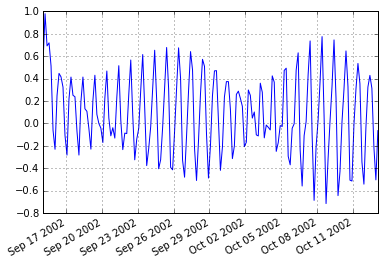

In [10]:
plt.plot(dates,ssh[:,y,150])
fig=plt.gcf()
fig.autofmt_xdate()
plt.grid()

Yes, it looks like the tidal signal is mainly diurnal here at x=150.

<matplotlib.colorbar.Colorbar instance at 0x7f3f77818fc8>

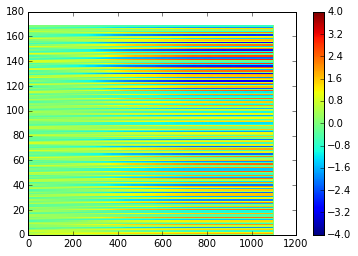

In [11]:
plt.pcolormesh(ssh[:,y,:],vmin=-4,vmax=4)
plt.colorbar()

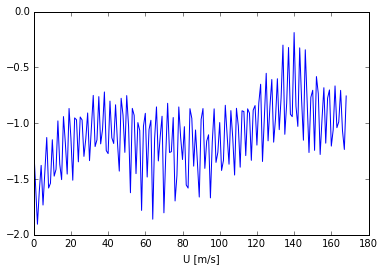

In [12]:
plt.plot(U[:,0,y,10])
plt.xlabel('U [m/s]')

In [13]:
print U.max()
print U.min()

1.65674
-3.09692


<matplotlib.colorbar.Colorbar instance at 0x7f3f775c72d8>

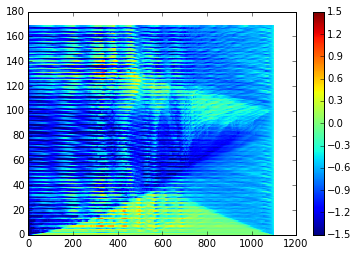

In [14]:
plt.pcolormesh(U[:,0,y,:],vmin=-1.5,vmax=1.5)
plt.colorbar()

#Plot at a time

In [15]:
def plot_variables(t):
    date =time_origin + datetime.timedelta(seconds = times[t])
    print date.strftime('%Y-%m-%d %H:%M')
    fig,axs = plt.subplots(3,2,figsize= (10,10))

    #salnity
    ax=axs[0,0]
    mesh=ax.pcolormesh(np.arange(0,sal.shape[3]),deps,sal[t,:,y,:],vmin=smin,vmax=smax)
    ax.set_ylim([400,0])
    ax.set_xlim([0,1100])
    plt.colorbar(mesh,ax=ax)
    ax.set_title('Salinity')

    #temp
    ax=axs[0,1]
    mesh=ax.pcolormesh(np.arange(0,temp.shape[3]),deps,temp[t,:,y,:],vmin=tmin,vmax=tmax)
    ax.set_ylim([400,0])
    ax.set_xlim([0,1100])
    plt.colorbar(mesh,ax=ax)
    ax.set_title('Temperature')

    #diff
    dmin=0; dmax=100
    ax=axs[1,1]
    mesh=ax.pcolormesh(np.arange(0,avt.shape[3]),depsW,avt[t,:,y,:],vmin=dmin, vmax=dmax, cmap='hot')
    ax.set_ylim([400,0])
    ax.set_xlim([0,1100])
    plt.colorbar(mesh,ax=ax)
    ax.set_title('Vertical eddy diff')

    #visct
    ax=axs[1,0]
    mesh=ax.pcolormesh(np.arange(0,avm.shape[3]),depsW,avm[t,:,y,:],vmin=dmin, vmax=dmax,cmap='hot')
    ax.set_ylim([400,0])
    ax.set_xlim([0,1100])
    plt.colorbar(mesh,ax=ax)
    ax.set_title('Vertical eddy visc')

    #n2
    ax=axs[2,0]
    mesh=ax.pcolormesh(np.arange(0,n2.shape[3]),deps,n2[t,:,y,:])
    ax.set_ylim([400,0])
    ax.set_xlim([0,1100])
    plt.colorbar(mesh,ax=ax)
    ax.set_title('Squared buoyancy frequency')

    #U
    ax=axs[2,1]
    mesh=ax.pcolormesh(np.arange(0,U.shape[3]),depsU,U[t,:,y,:],vmin=umin, vmax=umax)
    ax.set_ylim([400,0])
    ax.set_xlim([0,1100])
    plt.colorbar(mesh,ax=ax)
    ax.set_title('U')
    
    return fig

Spring tide

2002-09-26 06:00


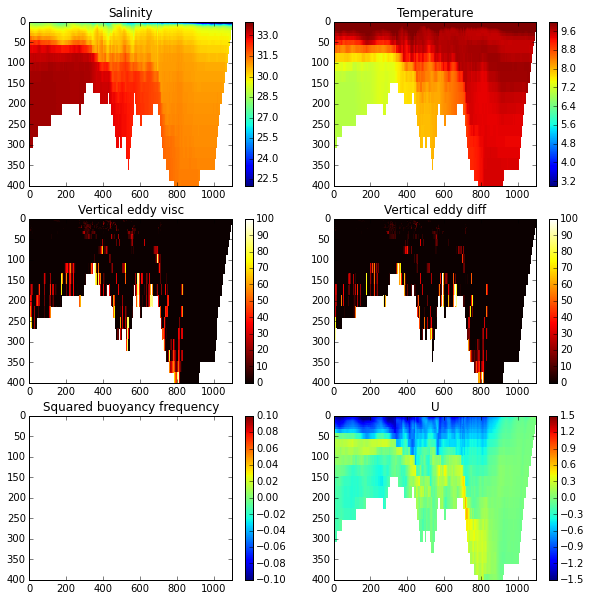

In [20]:
fig = plot_variables(67)

Buoyancy frequency didn;t work

Neap

2002-10-03 10:00


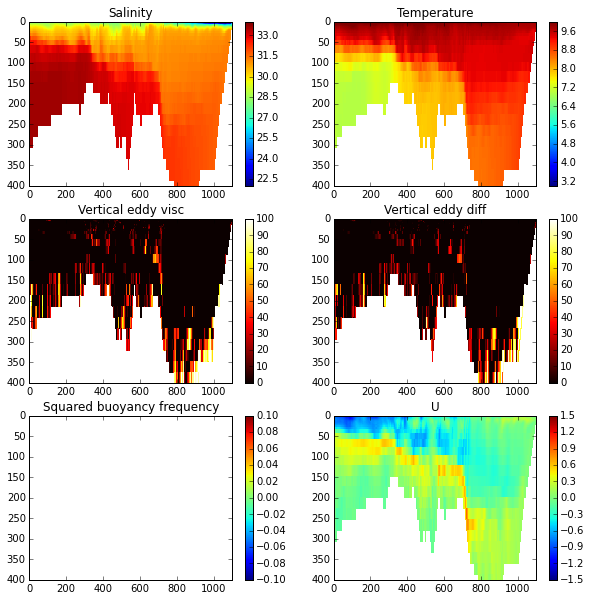

In [17]:
fig = plot_variables(110)

#Depth and thickness of cells

In [21]:
print dT

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format UNDEFINED):
    name: SalishSea_4h_20020915_20021013
    description: ocean T grid variables
    conventions: CF-1.1
    production: An IPSL model
    timeStamp: 2015-Aug-07 11:50:44 PDT
    dimensions(sizes): x(1100), y(10), deptht(40), time_counter(169), time_bounds(2)
    variables(dimensions): float32 nav_lat(y,x), float32 nav_lon(y,x), float32 deptht(deptht), float32 sossheig(time_counter,y,x), float64 time_centered(time_counter), float64 time_centered_bounds(time_counter,time_bounds), float64 time_counter(time_counter), float64 time_counter_bounds(time_counter,time_bounds), float32 votemper(time_counter,deptht,y,x), float32 vosaline(time_counter,deptht,y,x), float32 buoy_n2(time_counter,deptht,y,x), float32 T-depth_vvl(time_counter,deptht,y,x), float32 T-thick_vvl(time_counter,deptht,y,x)
    groups: 



In [32]:
Tdep = dT.variables['T-depth_vvl']
Tthick = dT.variables['T-thick_vvl']

[1000, 1100, 30, 0]

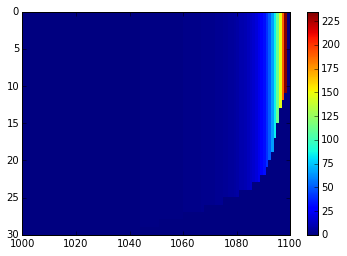

In [43]:
t=75
plt.pcolormesh(Tthick[t,:,y,:])
plt.colorbar()
plt.axis([1000,1100,30,0])

In [34]:
print Tthick

<type 'netCDF4._netCDF4.Variable'>
float32 T-thick_vvl(time_counter, deptht, y, x)
    long_name: T-cell thickness deformation
    units: %
    online_operation: average
    interval_operation: 40s
    interval_write: 4h
    _FillValue: 1e+20
    missing_value: 1e+20
    coordinates: time_centered deptht nav_lon nav_lat
unlimited dimensions: time_counter
current shape = (169, 40, 10, 1100)
filling on


[0, 1100, 40, 25]

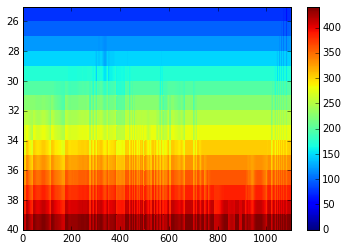

In [38]:
t=120
plt.pcolormesh(Tdep[t,:,y,:])
plt.colorbar()
plt.axis([0,1100,40,25])

In [37]:
print Tdep

<type 'netCDF4._netCDF4.Variable'>
float32 T-depth_vvl(time_counter, deptht, y, x)
    long_name: T-point depth
    units: m
    online_operation: average
    interval_operation: 40s
    interval_write: 4h
    _FillValue: 1e+20
    missing_value: 1e+20
    coordinates: time_centered deptht nav_lon nav_lat
unlimited dimensions: time_counter
current shape = (169, 40, 10, 1100)
filling on
